In [58]:
#importin libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [59]:
data = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
# The dataset has been loaded into the variable 'data'

In [60]:
data

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [61]:
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [62]:
print(data.shape)
# The dataset consist of 33 columns and 53392 rows

(53392, 33)


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [64]:
# Calculating the number of missing values in each column
missing_values = data.isnull().sum()

In [65]:
missing_values

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [66]:
# Calculating the percentage of missing values in each column
missing_values*100/len(data)

YearStart                       0.000000
YearEnd                         0.000000
LocationAbbr                    0.000000
LocationDesc                    0.000000
Datasource                      0.000000
Class                           0.000000
Topic                           0.000000
Question                        0.000000
Data_Value_Unit               100.000000
Data_Value_Type                 0.000000
Data_Value                      9.450854
Data_Value_Alt                  9.450854
Data_Value_Footnote_Symbol     90.549146
Data_Value_Footnote            90.549146
Low_Confidence_Limit            9.450854
High_Confidence_Limit           9.450854
Sample_Size                     9.450854
Total                          96.428304
Age(years)                     78.577315
Education                      85.713215
Gender                         92.856608
Income                         74.998127
Race/Ethnicity                 71.426431
GeoLocation                     1.887923
ClassID         

In [67]:
#to clean the data we drop the features which has around more than 70 percentage null value percentage
#there are also some duplicate columns which have exactly same values so we should drop that features also
#
columns_to_drop = ['YearEnd','LocationAbbr','Sample_Size' ,'Datasource','Topic','Data_Value_Unit','Data_Value_Type','Data_Value_Alt','Data_Value_Footnote_Symbol','Data_Value_Footnote','Total','GeoLocation','ClassID','TopicID','QuestionID','DataValueTypeID','LocationID','StratificationCategory1','Stratification1','StratificationCategoryId1','StratificationID1']
data.drop(columns=columns_to_drop, inplace = True)

In [68]:
# Filter the 'data' DataFrame to exclude rows where 'Income' is reported as 'Data not reported'
data = data[data['Income'] != 'Data not reported']

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51485 entries, 0 to 53391
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               51485 non-null  int64  
 1   LocationDesc            51485 non-null  object 
 2   Class                   51485 non-null  object 
 3   Question                51485 non-null  object 
 4   Data_Value              46439 non-null  float64
 5   Low_Confidence_Limit    46439 non-null  float64
 6   High_Confidence_Limit   46439 non-null  float64
 7   Age(years)              11438 non-null  object 
 8   Education               7628 non-null   object 
 9   Gender                  3814 non-null   object 
 10  Income                  11442 non-null  object 
 11  Race/Ethnicity          15256 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 5.1+ MB


In [70]:
#there are 3 different class in class column, i have seleceted class "Obesity / Weight Status" while my other teammates are working on some other class
#we will be predicting some value of class "Obesity / Weight Status" with respect to other features
val_to_drop = 'Fruits and Vegetables'
filter_data = data[data['Class'] != val_to_drop]
unique_values = filter_data['Class'].nunique()
unique_values

2

In [71]:
#dropping one more class so that i can be left with only one class "Obesity / Weight Status" which is my requirement.
val_to_drop1 = 'Physical Activity'
filter_data1 = filter_data[filter_data['Class'] != val_to_drop1]
unique_values = filter_data1['Class'].nunique()
unique_values

1

In [72]:
columns_list = filter_data1.columns.tolist()
print(columns_list)

['YearStart', 'LocationDesc', 'Class', 'Question', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity']


In [73]:
filter_data1['Question']

0        Percent of adults aged 18 years and older who ...
1        Percent of adults aged 18 years and older who ...
2        Percent of adults aged 18 years and older who ...
3        Percent of adults aged 18 years and older who ...
4        Percent of adults aged 18 years and older who ...
                               ...                        
51847    Percent of adults aged 18 years and older who ...
51848    Percent of adults aged 18 years and older who ...
51849    Percent of adults aged 18 years and older who ...
51850    Percent of adults aged 18 years and older who ...
51851    Percent of adults aged 18 years and older who ...
Name: Question, Length: 17280, dtype: object

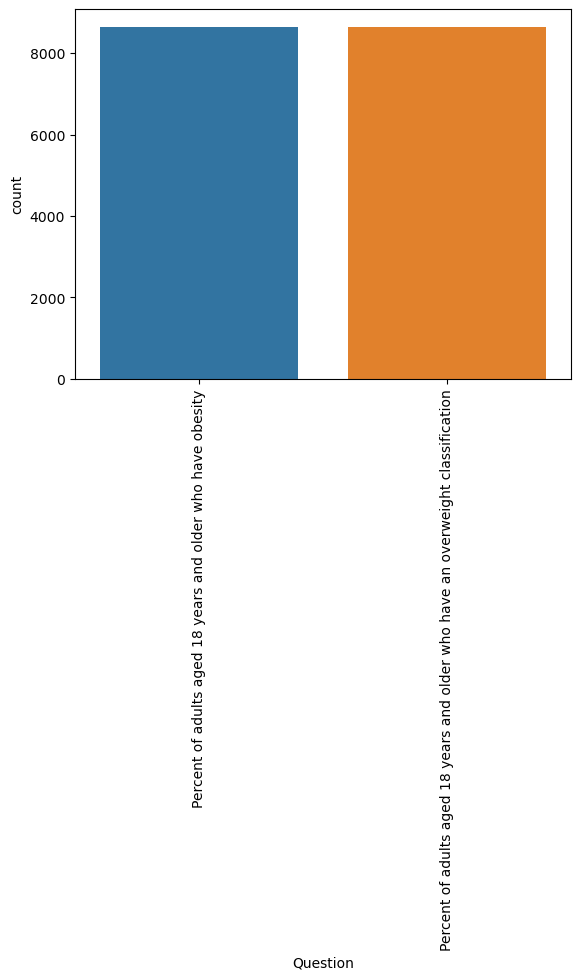

In [74]:
#we are plotting count plot between count and Question, from which we an observe that there no significance different between two Question
sns.countplot(data=filter_data1,x='Question')
plt.xticks(rotation=90)
plt.show()

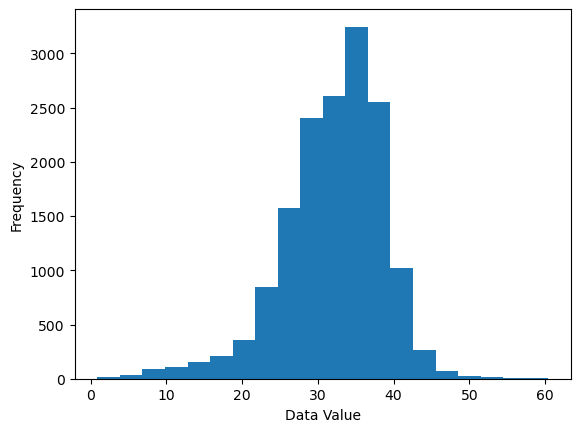

In [75]:
#plotting histogram between data value and frequency, which depicts that data value between 30-40 have max frequency 
plt.hist(filter_data1['Data_Value'], bins=20)
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

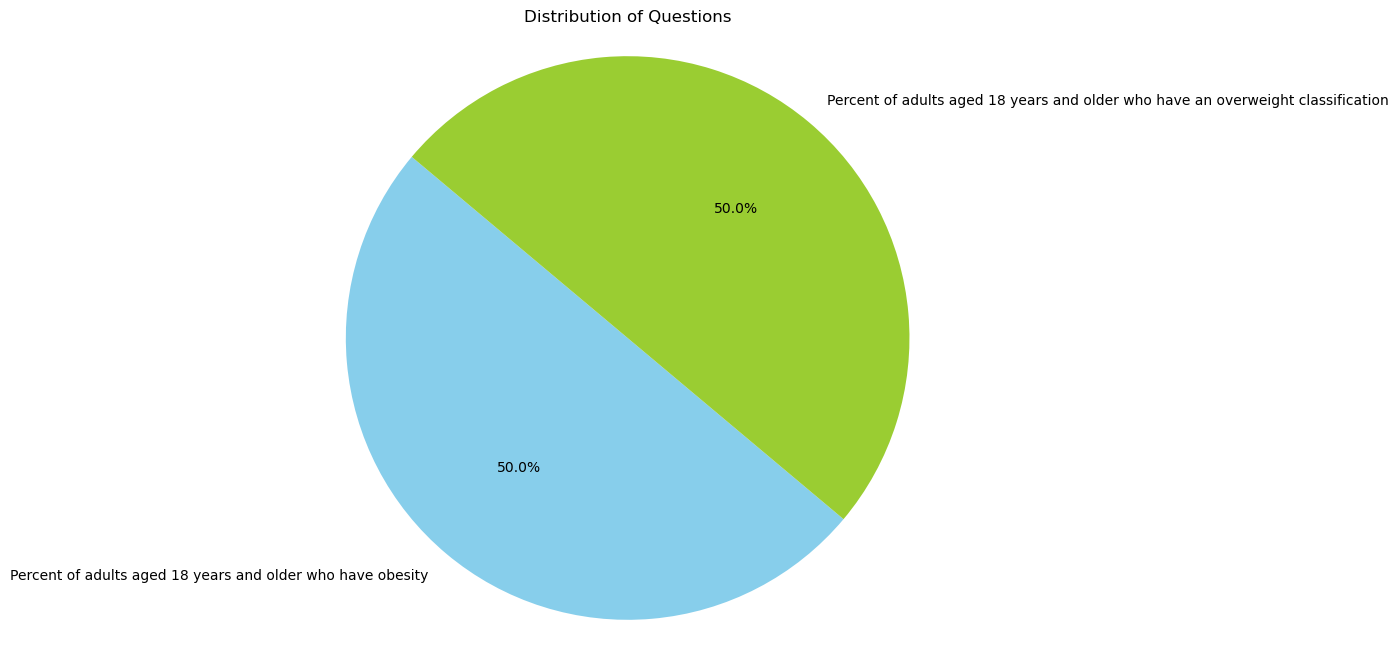

In [76]:
#creating pie chart of distribution of questions which depicts that there are two question in class obesity/weight status which have equal distribution which is 50 percentage
question_counts = filter_data1['Question'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(question_counts, labels=question_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'yellowgreen', 'coral', 'gold'])
plt.title('Distribution of Questions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

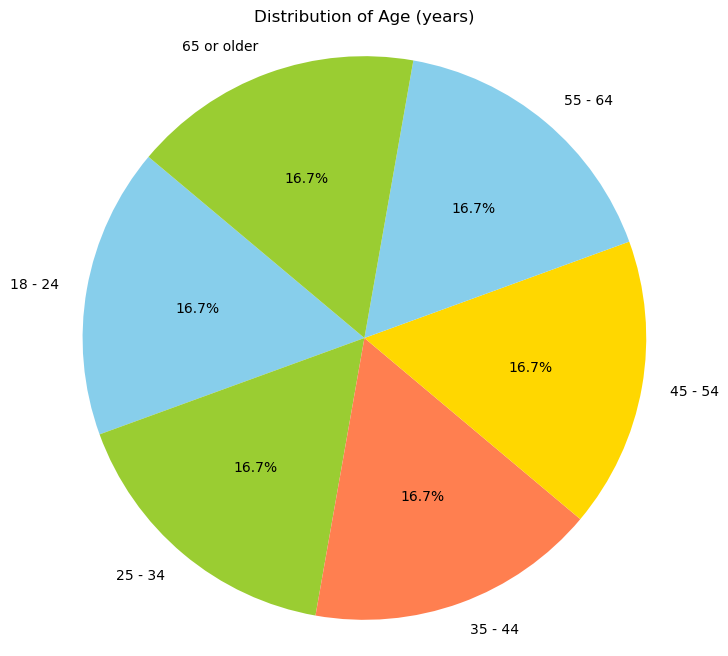

In [77]:
#creating pie chart of distribution of Age shows that there are 6 division in age of the class obesity/weight status which have equal distribution which is 16.7 percentage

age_counts = filter_data1['Age(years)'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'yellowgreen', 'coral', 'gold'])
plt.title('Distribution of Age (years)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


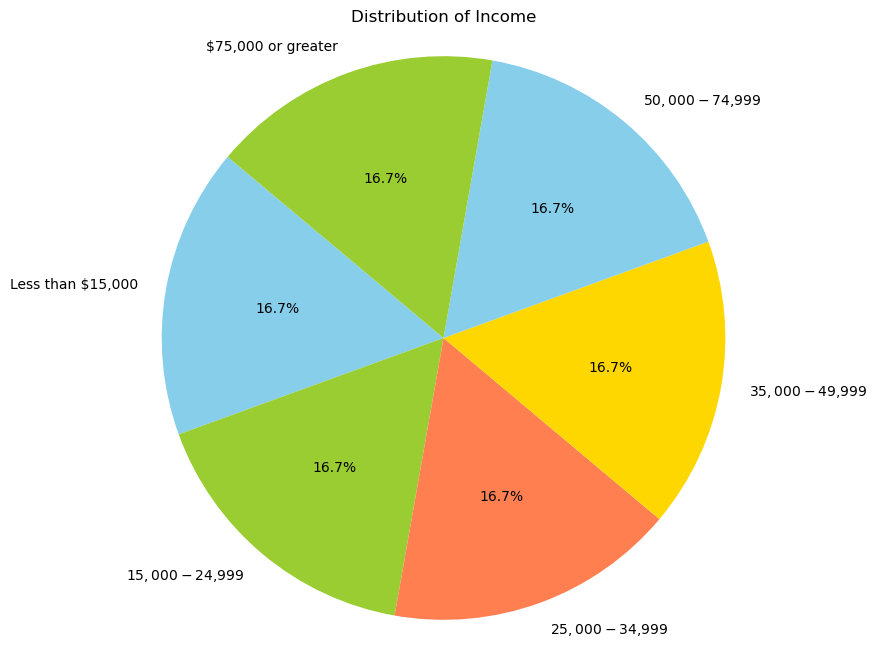

In [78]:
#creating pie chart of distribution of Income which shows that there are 6 division in Income column of the class obesity/weight status which have equal distribution which is 16.7 percentage
income_counts = filter_data1['Income'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'yellowgreen', 'coral', 'gold'])
plt.title('Distribution of Income')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


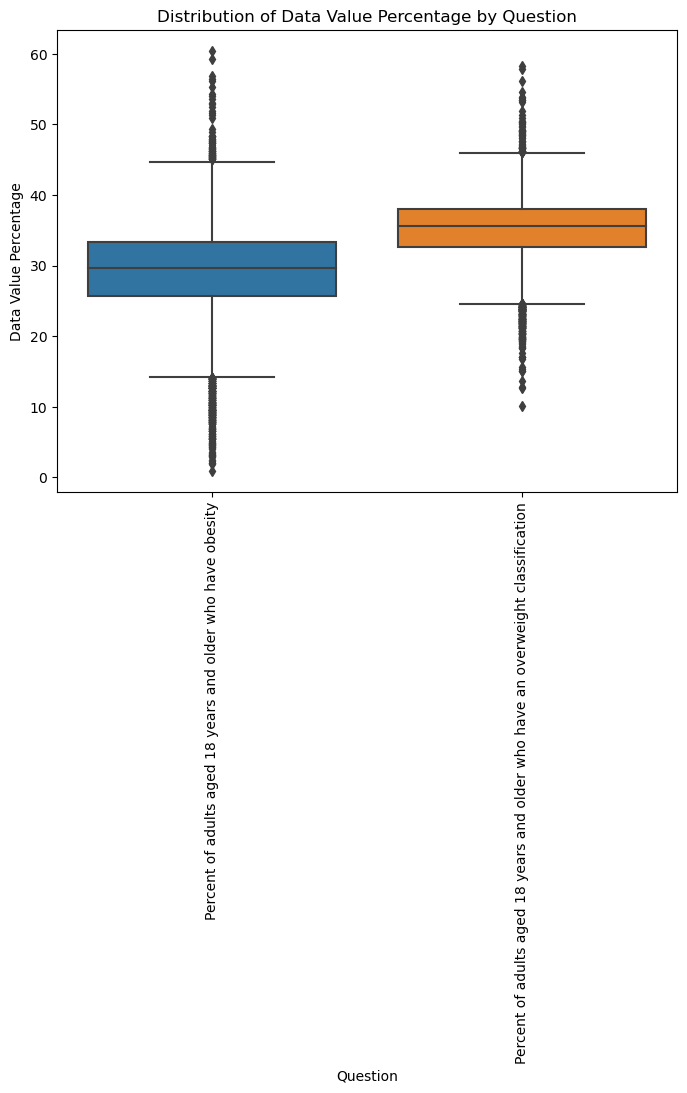

In [79]:
# plotting the box plot of data value with respect to question
#plot depicts that most values lies in midddle and high value which are far away are outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(data=filter_data1, x='Question', y='Data_Value')
plt.xticks(rotation=90)
plt.title('Distribution of Data Value Percentage by Question')
plt.xlabel('Question')
plt.ylabel('Data Value Percentage')
plt.show()

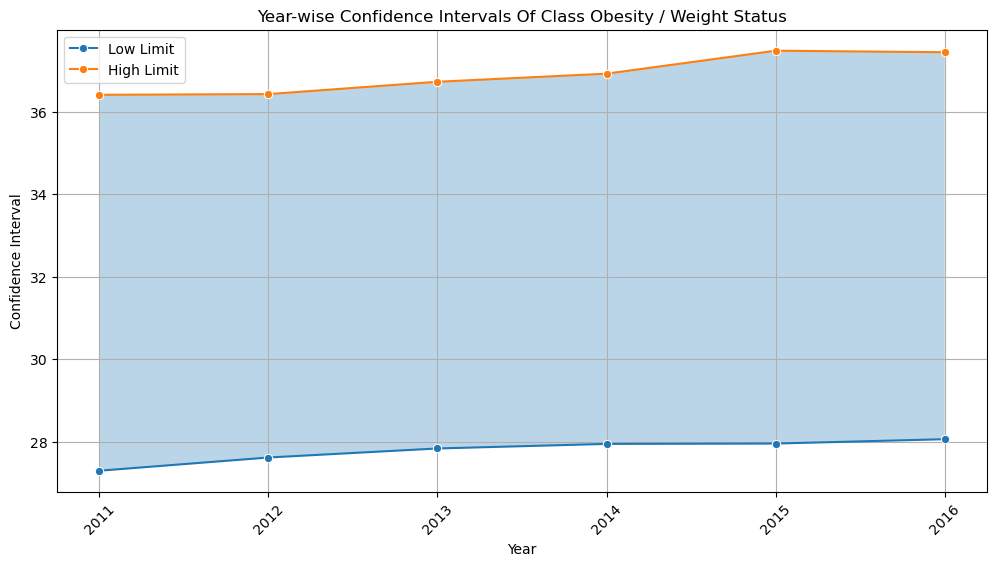

In [80]:
#this plot shows year wise confidence interval of class obesity/Weight status, we can see the change in confidence intervals over the years
confidence_intervals = filter_data1.groupby('YearStart')[['Low_Confidence_Limit','High_Confidence_Limit ']].mean().reset_index()
# Confidence intervals year wise. 
plt.figure(figsize=(12, 6))
sns.lineplot(data=confidence_intervals, x='YearStart', y='Low_Confidence_Limit', marker='o', label='Low Limit')
sns.lineplot(data=confidence_intervals, x='YearStart', y='High_Confidence_Limit ', marker='o', label='High Limit')
plt.fill_between(confidence_intervals['YearStart'], confidence_intervals['Low_Confidence_Limit'], confidence_intervals['High_Confidence_Limit '], alpha=0.3)
plt.title('Year-wise Confidence Intervals Of Class Obesity / Weight Status')
plt.xlabel('Year')
plt.ylabel('Confidence Interval')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

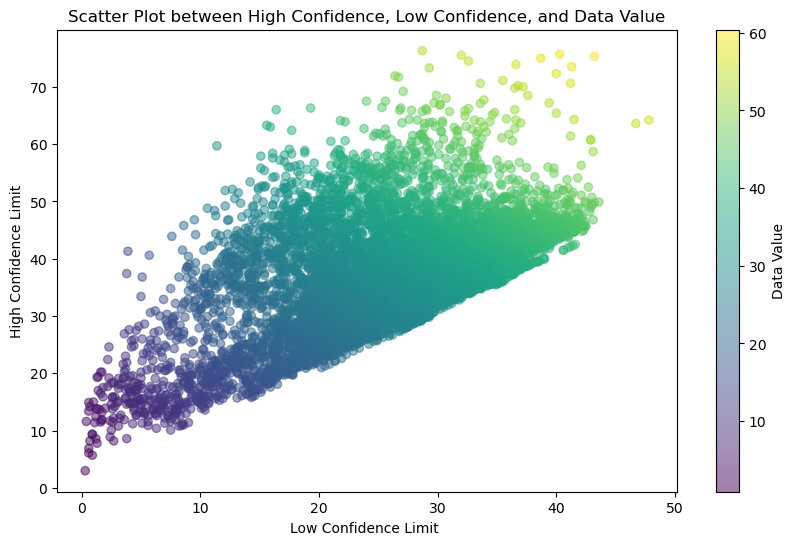

In [81]:
# From this scatter plot we can observe that when the confidence interval is increased the data value is increased and vice versa.

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(filter_data1['Low_Confidence_Limit'], filter_data1['High_Confidence_Limit '], c=filter_data1['Data_Value'], cmap='viridis', alpha=0.5)

# Add labels and title
plt.xlabel('Low Confidence Limit ')
plt.ylabel('High Confidence Limit')
plt.title('Scatter Plot between High Confidence, Low Confidence, and Data Value')

# Add colorbar for Data_Value
plt.colorbar(label='Data Value')

plt.show()

In [82]:
filter_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17280 entries, 0 to 51851
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               17280 non-null  int64  
 1   LocationDesc            17280 non-null  object 
 2   Class                   17280 non-null  object 
 3   Question                17280 non-null  object 
 4   Data_Value              15614 non-null  float64
 5   Low_Confidence_Limit    15614 non-null  float64
 6   High_Confidence_Limit   15614 non-null  float64
 7   Age(years)              3840 non-null   object 
 8   Education               2560 non-null   object 
 9   Gender                  1280 non-null   object 
 10  Income                  3840 non-null   object 
 11  Race/Ethnicity          5120 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.7+ MB


In [83]:
#selecting all numeric data which have Dtype 'int64','float64'.
numeric_data = filter_data1.select_dtypes(include = ['int64','float64'])
filter_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17280 entries, 0 to 51851
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               17280 non-null  int64  
 1   LocationDesc            17280 non-null  object 
 2   Class                   17280 non-null  object 
 3   Question                17280 non-null  object 
 4   Data_Value              15614 non-null  float64
 5   Low_Confidence_Limit    15614 non-null  float64
 6   High_Confidence_Limit   15614 non-null  float64
 7   Age(years)              3840 non-null   object 
 8   Education               2560 non-null   object 
 9   Gender                  1280 non-null   object 
 10  Income                  3840 non-null   object 
 11  Race/Ethnicity          5120 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.7+ MB


In [84]:
#some of features are categorical.
# So in order to check the effect of all these columns we are applying one hot encoding which will mark "1" and "0" if data is present or not respectively.
# Applying one-hot encoding
filter_data1 = pd.get_dummies(filter_data1, columns=['Age(years)', 'Education','Gender','Income','Race/Ethnicity'], prefix=['Age(years)', 'Education','Gender','Income','Race\Ethnicity'])


In [85]:
filter_data1.shape

(17280, 33)

In [86]:
#encoding the value to plot heatmap in the upcoming cell
# 'columns_to_encode' is a list of column names to be encoded
columns_to_encode = ['LocationDesc', 'Question']  # Replace with your column names

le = LabelEncoder()

for col in columns_to_encode:
    filter_data1[col] = le.fit_transform(filter_data1[col])

In [87]:
#we can the chagne in the column that out column got increase by encoding the value
filter_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17280 entries, 0 to 51851
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   YearStart                                     17280 non-null  int64  
 1   LocationDesc                                  17280 non-null  int32  
 2   Class                                         17280 non-null  object 
 3   Question                                      17280 non-null  int32  
 4   Data_Value                                    15614 non-null  float64
 5   Low_Confidence_Limit                          15614 non-null  float64
 6   High_Confidence_Limit                         15614 non-null  float64
 7   Age(years)_18 - 24                            17280 non-null  uint8  
 8   Age(years)_25 - 34                            17280 non-null  uint8  
 9   Age(years)_35 - 44                            17280 non-null 

In [88]:
# Column slicing for correlation
main_data = filter_data1.iloc[:,:7]

In [89]:
# Column slicing for correlation
age_data = filter_data1.iloc[:,7:13]
age_data = pd.concat([main_data,age_data], axis = 1)
age_data_corr = age_data.corr()

C:\Users\hkraw\AppData\Local\Temp\ipykernel_904\1231769615.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  age_data_corr = age_data.corr()


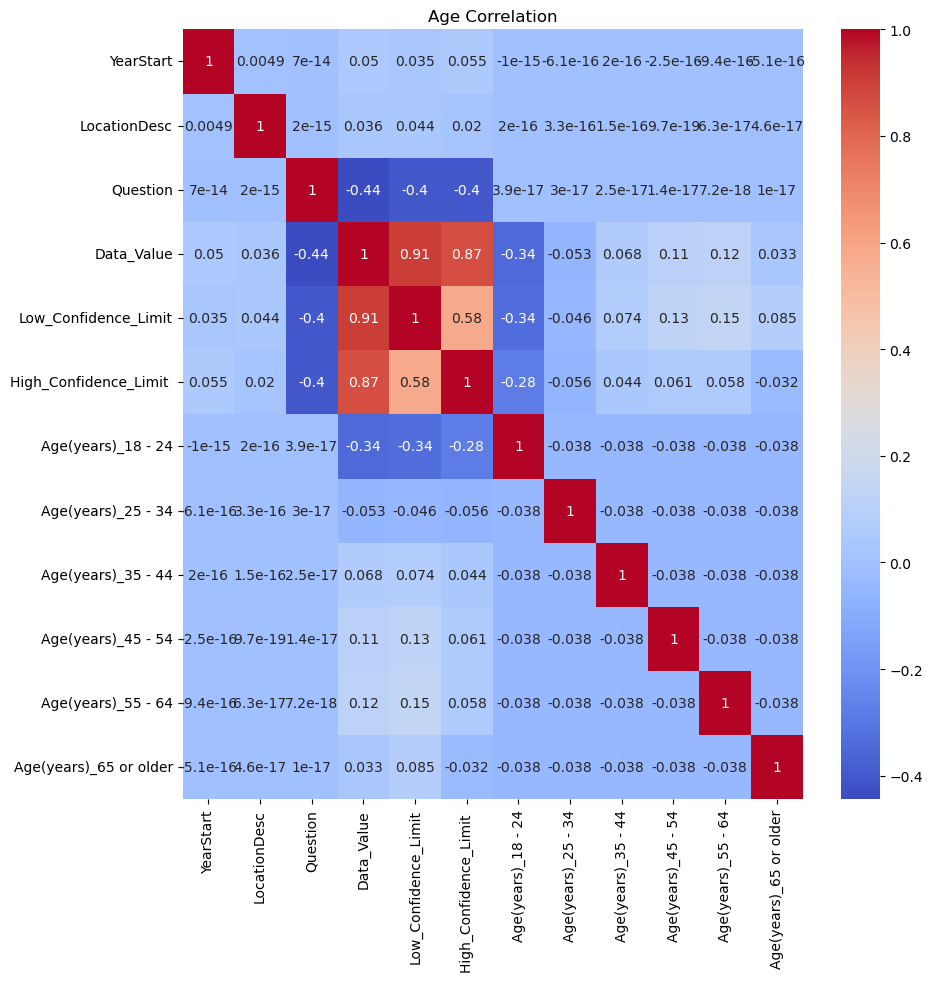

In [90]:
# Correlation heatmap between 'YearStart', 'LocationDesc', 'Question', 'Data_Value', 
# 'Age(years)_18 - 24','Age(years)_25 - 34','Age(years)_35 - 44','Age(years)_45 - 54','Age(years)_55 - 64','Age(years)_65 or older'
# We can observe that age has no significant correlation with Data_Value
plt.figure(figsize=(10,10))
sns.heatmap(age_data_corr, annot = True, cmap='coolwarm')
plt.title('Age Correlation')
plt.show()

In [91]:
# Column slicing for correlation
edu_data = filter_data1.iloc[:,13:17]
edu_data = pd.concat([main_data,edu_data], axis = 1)
edu_data_corr = edu_data.corr()

C:\Users\hkraw\AppData\Local\Temp\ipykernel_904\3338914852.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  edu_data_corr = edu_data.corr()


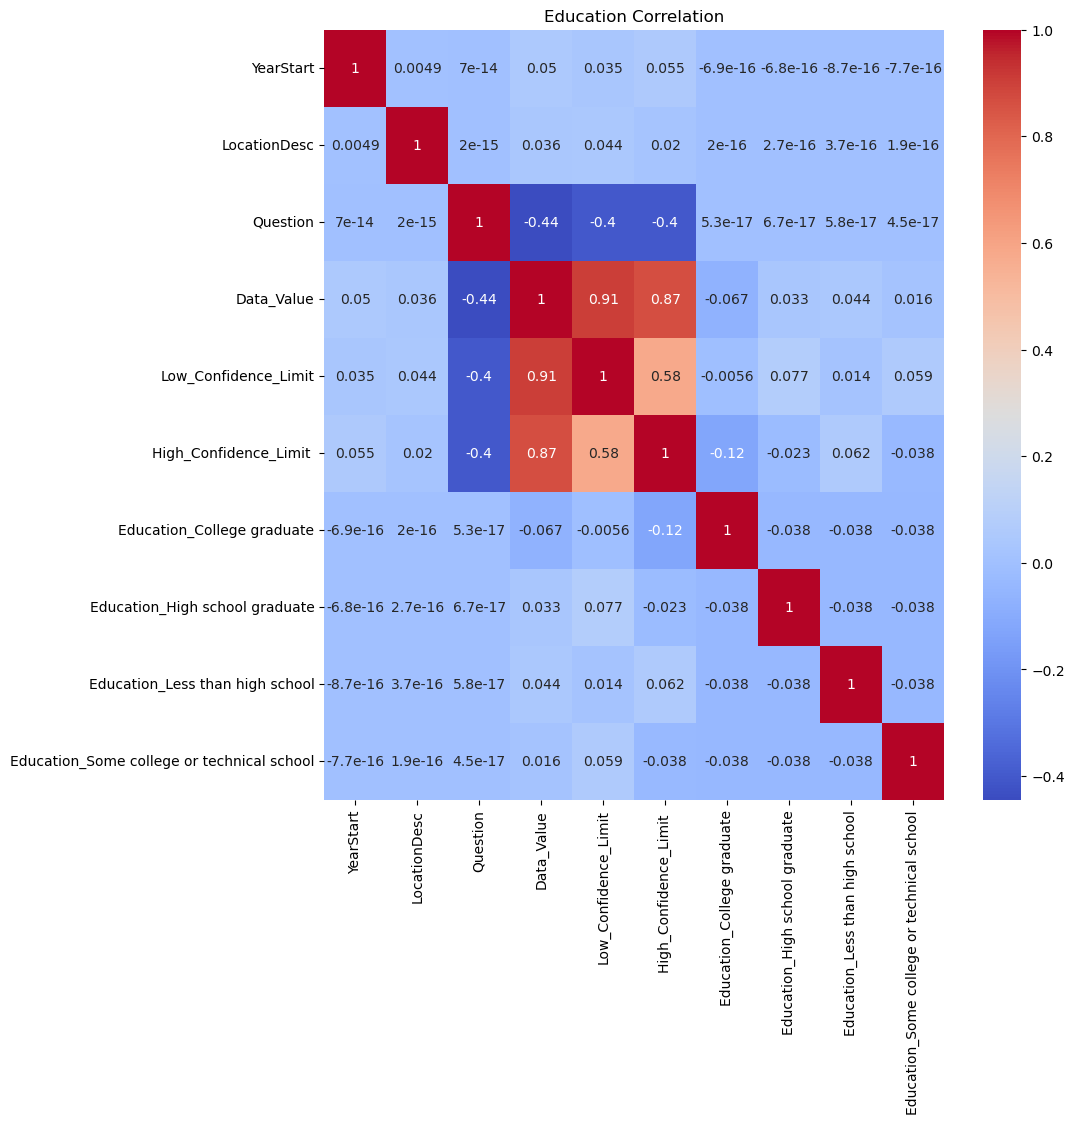

In [92]:
# Correlation heatmap of different values of education and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value'
# We can observe that education has no significant correlation with Data_Value
plt.figure(figsize=(10,10))
sns.heatmap(edu_data_corr, annot = True, cmap='coolwarm')
plt.title('Education Correlation')
plt.show()

In [93]:
# Column slicing for correlation
gender_data = filter_data1.iloc[:,17:19]
gender_data = pd.concat([main_data,gender_data], axis = 1)
gender_data_corr = gender_data.corr()

C:\Users\hkraw\AppData\Local\Temp\ipykernel_904\2422978709.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gender_data_corr = gender_data.corr()


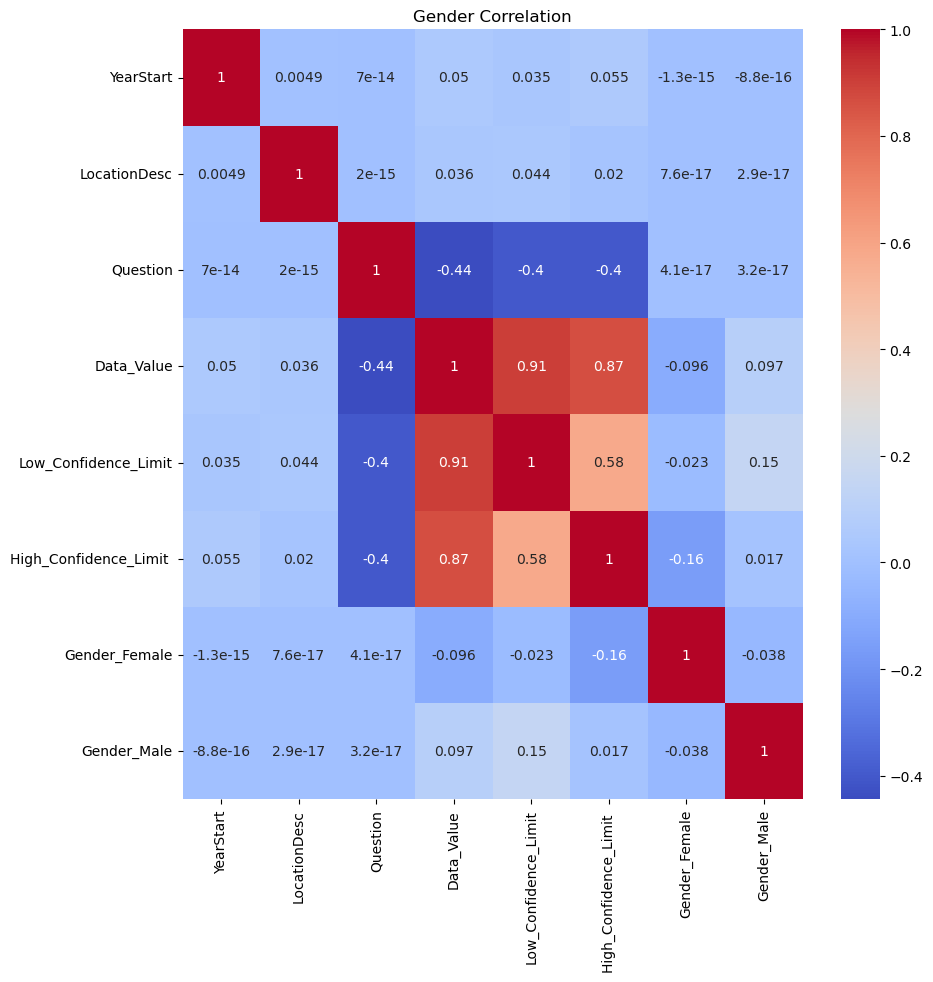

In [94]:
# Correlation heatmap of different values of Gender and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value'
# We can observe that gender has no significant correlation with Data_Value
plt.figure(figsize=(10,10))
sns.heatmap(gender_data_corr, annot = True, cmap='coolwarm')
plt.title('Gender Correlation')
plt.show()

In [95]:
# Column slicing for correlation
income_data = filter_data1.iloc[:,19:25]
income_data = pd.concat([main_data,income_data], axis = 1)
income_data_corr = income_data.corr()

C:\Users\hkraw\AppData\Local\Temp\ipykernel_904\598609293.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  income_data_corr = income_data.corr()


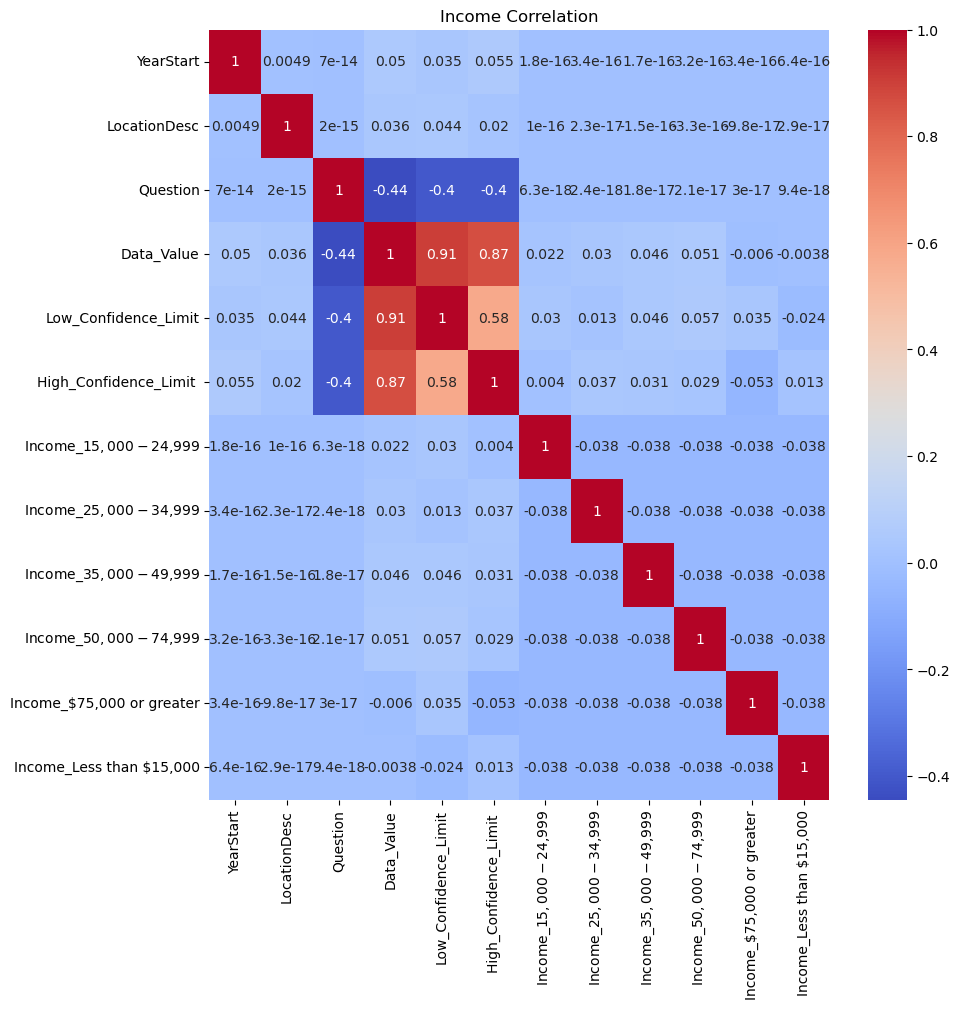

In [96]:
# Correlation heatmap of different values of income and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value'
# We can observe that income has no significant correlation with Data_Value
plt.figure(figsize=(10,10))
sns.heatmap(income_data_corr, annot = True, cmap='coolwarm')
plt.title('Income Correlation')
plt.show()

In [97]:
# Column slicing for correlation
race_data = filter_data1.iloc[:,25:]
race_data = pd.concat([main_data,race_data], axis = 1)
race_data_corr = race_data.corr()

C:\Users\hkraw\AppData\Local\Temp\ipykernel_904\2296979091.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  race_data_corr = race_data.corr()


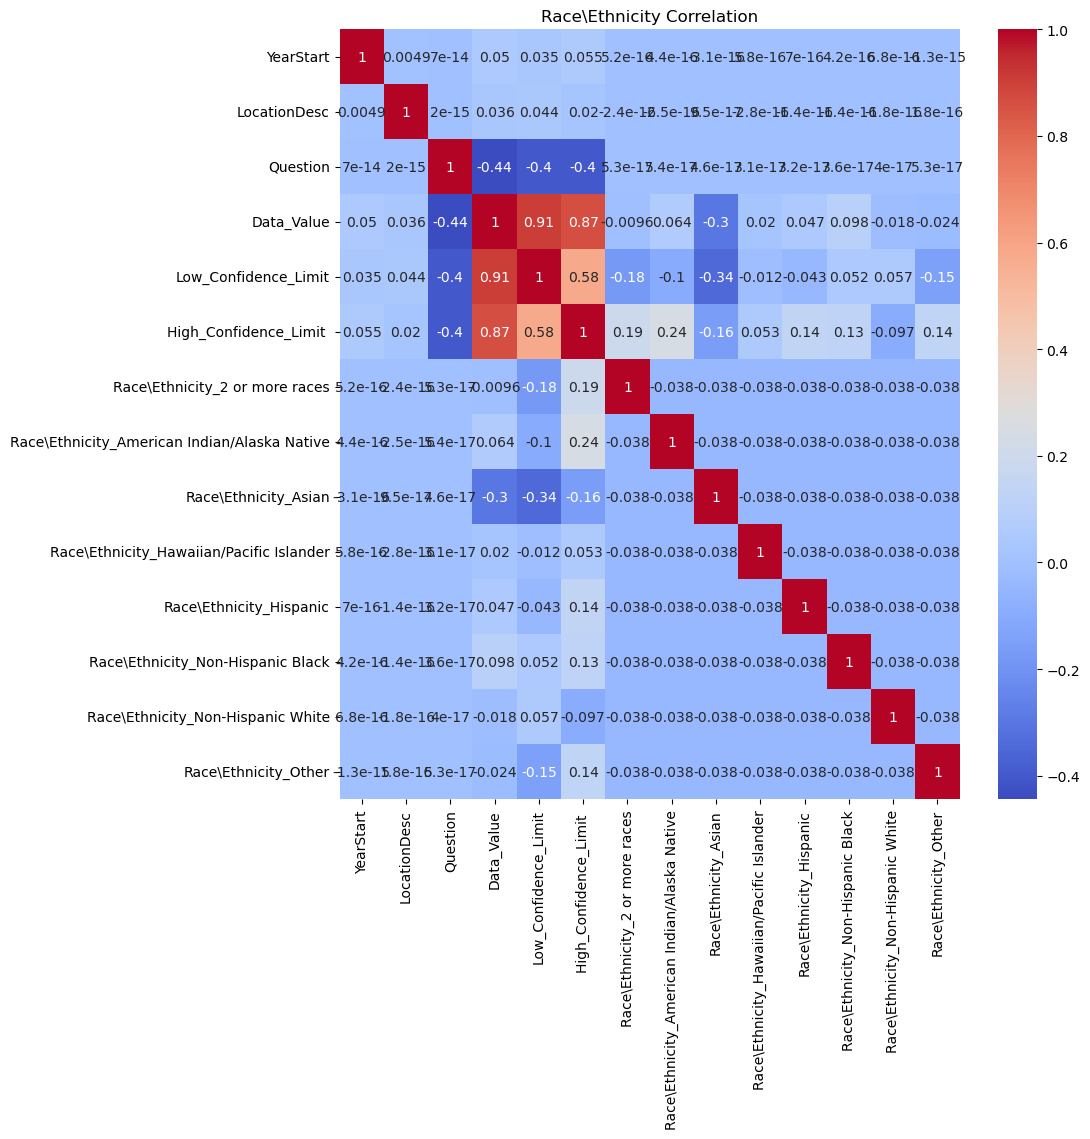

In [98]:
# Correlation heatmap of different values of race/ethnicity and 'YearStart', 'LocationDesc', 'Class' , 'Question', 'Data_Value'
# We can observe that race/ethnicity has no significant correlation with Data_Value
plt.figure(figsize=(10,10))
sns.heatmap(race_data_corr, annot = True, cmap='coolwarm')
plt.title('Race\Ethnicity Correlation')
plt.show()

In [99]:
#removing outliers, by usign z score threshold to 3 bacause most of the data lie in +3 to -3
z_score_thresh = 3
for col in numeric_data.columns[0:]:
    z_score = zscore(filter_data1[col])
    outliers= (z_score > z_score_thresh) | (z_score < -z_score_thresh)
    filter_data1 = filter_data1[~outliers]

In [100]:
#checking missing column
filter_data1.isnull().sum()

YearStart                                          0
LocationDesc                                       0
Class                                              0
Question                                           0
Data_Value                                      1666
Low_Confidence_Limit                            1666
High_Confidence_Limit                           1666
Age(years)_18 - 24                                 0
Age(years)_25 - 34                                 0
Age(years)_35 - 44                                 0
Age(years)_45 - 54                                 0
Age(years)_55 - 64                                 0
Age(years)_65 or older                             0
Education_College graduate                         0
Education_High school graduate                     0
Education_Less than high school                    0
Education_Some college or technical school         0
Gender_Female                                      0
Gender_Male                                   

In [101]:
#checking missing values in percentage
filter_data1.isnull().sum() * 100 / len(filter_data1)

YearStart                                       0.000000
LocationDesc                                    0.000000
Class                                           0.000000
Question                                        0.000000
Data_Value                                      9.641204
Low_Confidence_Limit                            9.641204
High_Confidence_Limit                           9.641204
Age(years)_18 - 24                              0.000000
Age(years)_25 - 34                              0.000000
Age(years)_35 - 44                              0.000000
Age(years)_45 - 54                              0.000000
Age(years)_55 - 64                              0.000000
Age(years)_65 or older                          0.000000
Education_College graduate                      0.000000
Education_High school graduate                  0.000000
Education_Less than high school                 0.000000
Education_Some college or technical school      0.000000
Gender_Female                  

In [102]:
# Calculating Mean, Mode and Median for feature Data_Value and we can see that it has almost same mean and median.
# mean < median < mode
# By above line we can say that the distribution is bit negativily skewed.
# So we can replace the missing values with median for this feature.
print("Mean", filter_data1['Data_Value'].mean())
print("Median", filter_data1['Data_Value'].median())
print("Mode", filter_data1['Data_Value'].mode())


Mean 32.06885487383118
Median 33.0
Mode 0    35.4
Name: Data_Value, dtype: float64


In [103]:
#filling missing value with median
filter_data1['Data_Value'].fillna(filter_data1['Data_Value'].median(),inplace = True)

In [104]:
# Calculating Mean, Mode and Median for feature Low_Confidence_Limit and we can see that it has almost same mean, mode and median values.
# mean < median < mode
# the distribution is bit negatively skewed.
# So we can replace the missing values with median for this feature.
print("Mean", filter_data1['Low_Confidence_Limit'].mean())
print("Median", filter_data1['Low_Confidence_Limit'].median())
print("Mode", filter_data1['Low_Confidence_Limit'].mode())

Mean 27.78507749455617
Median 28.6
Mode 0    33.6
Name: Low_Confidence_Limit, dtype: float64


In [105]:
#filling missing value with median
filter_data1['Low_Confidence_Limit'].fillna(filter_data1['Low_Confidence_Limit'].median(),inplace = True)

In [106]:
# Calculating Mean, Mode and Median for feature High_Confidence_Limit and we can see that it has almost same mean and median values.
# mean < median < mode
# This means that the distribution is bit negatively skewed.
# We can replace the missing values with median for this feature.
print("Mean", filter_data1['High_Confidence_Limit '].mean())
print("Median", filter_data1['High_Confidence_Limit '].median())
print("Mode", filter_data1['High_Confidence_Limit '].mode())

Mean 36.9085820417574
Median 37.5
Mode 0    38.8
Name: High_Confidence_Limit , dtype: float64


In [107]:
#filling missing value with median
filter_data1['High_Confidence_Limit '].fillna(filter_data1['High_Confidence_Limit '].median(),inplace = True)

In [108]:
# Now there are not missing values present
filter_data1.isnull().sum() * 100 / len(filter_data1)

YearStart                                       0.0
LocationDesc                                    0.0
Class                                           0.0
Question                                        0.0
Data_Value                                      0.0
Low_Confidence_Limit                            0.0
High_Confidence_Limit                           0.0
Age(years)_18 - 24                              0.0
Age(years)_25 - 34                              0.0
Age(years)_35 - 44                              0.0
Age(years)_45 - 54                              0.0
Age(years)_55 - 64                              0.0
Age(years)_65 or older                          0.0
Education_College graduate                      0.0
Education_High school graduate                  0.0
Education_Less than high school                 0.0
Education_Some college or technical school      0.0
Gender_Female                                   0.0
Gender_Male                                     0.0
Income_$15,0

In [109]:
# Training our model for three highly correlated features
# Here I have taken Data_Value feature as target, because I want to predict the percentage of surety that a value will lie in the given interval for the class "Obesity / Weight Status"

X = filter_data1[['High_Confidence_Limit ', 'Low_Confidence_Limit','Question']]
y = filter_data1['Data_Value']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Create dicntionaries to store evaluation rmse and r2
rmse_values = {}
r2_values = {}
# Iterate over different degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train a Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred_poly = poly_model.predict(X_test_poly)

    # Calculate rmse and r2
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)
    #storing rmse and r2 in dictionaries
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")

print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.2697155863285469
Degree 2: 0.10735599943019752
Degree 3: 0.06808465170004427
Degree 4: 0.052455448455780096
Degree 5: 0.04523233522774564

R² Values:
Degree 1: 0.998065866348192
Degree 2: 0.9996935729984417
Degree 3: 0.9998767539999823
Degree 4: 0.9999268430482331
Degree 5: 0.9999456033177028


In [110]:
# Training our model for three highly correlated features and with every age value(categorical and considered as feature) to see the effect of these features.
# Here I have taken Data_Value feature as target, because I want to predict the percentage of surety that a value will lie in the given interval for the class "Obesity / Weight Status"
X = filter_data1[['High_Confidence_Limit ', 'Low_Confidence_Limit','Question','Age(years)_18 - 24','Age(years)_25 - 34','Age(years)_35 - 44','Age(years)_45 - 54','Age(years)_55 - 64','Age(years)_65 or older']]
y = filter_data1['Data_Value']  # Dependent variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Creating dictionaries to store rmse and r2 score
rmse_values = {}
r2_values = {}
# Iterate over different degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train a Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred_poly = poly_model.predict(X_test_poly)

    # Calculating rmse and r2 score
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)
    
    # Storing rmse and r2 in dictionaries
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")

print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.2643562150461744
Degree 2: 0.10019201766120503
Degree 3: 0.06543189251448885
Degree 4: 0.05146923121212204
Degree 5: 0.04574244247072131

R² Values:
Degree 1: 0.9981419669140033
Degree 2: 0.9997331048770716
Degree 3: 0.9998861708857655
Degree 4: 0.999929568043041
Degree 5: 0.99994436948327


In [111]:
# Training our model for three highly correlated features and with every education value(categorical and considered as feature) to see the effect of these features.
# Here I have taken Data_Value feature as target, because I want to predict the percentage of surety that a value will lie in the given interval of the class "Obesity / Weight Status"
X = filter_data1[['High_Confidence_Limit ', 'Low_Confidence_Limit','Question','Education_College graduate','Education_High school graduate','Education_Less than high school','Education_Some college or technical school']]
y = filter_data1['Data_Value']  # Dependent variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Creating dictionaries to store rmse and r2 score
rmse_values = {}
r2_values = {}
# Iterate over different degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train a Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred_poly = poly_model.predict(X_test_poly)

    # Calculating rmse and r2 score
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)
    
    # Storing rmse and r2 in dictionaries
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")

print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.2689540528692939
Degree 2: 0.10650917174867017
Degree 3: 0.06765526577093504
Degree 4: 0.0521935030795441
Degree 5: 0.044994334769918896

R² Values:
Degree 1: 0.9980767728601708
Degree 2: 0.9996983881449147
Degree 3: 0.9998783036362864
Degree 4: 0.9999275718677789
Degree 5: 0.9999461742532906


In [112]:
# Training our model for three highly correlated features and with every Gender value(categorical and considered as feature) to see the effect of these features.
# Here I have taken Data_Value feature as target, because I want to predict the percentage of surety that a value will lie in the given interval of the class "Obesity / Weight Status"
X = filter_data1[['High_Confidence_Limit ', 'Low_Confidence_Limit','Question','Gender_Female','Gender_Male']]
y = filter_data1['Data_Value']  # Dependent variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Creating dictionaries to store rmse and r2 score
rmse_values = {}
r2_values = {}
# Iterate over different degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train a Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred_poly = poly_model.predict(X_test_poly)

    # Calculating rmse and r2 score
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)
    
    # Storing rmse and r2 in dictionaries
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")

print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.2668891190652457
Degree 2: 0.10312649686186572
Degree 3: 0.06681344219570699
Degree 4: 0.051565292049004584
Degree 5: 0.04893917721678798

R² Values:
Degree 1: 0.9981061912045639
Degree 2: 0.9997172419854706
Degree 3: 0.9998813132912451
Degree 4: 0.99992930489295
Degree 5: 0.9999363222484738


In [113]:
# Training our model for three highly correlated features and with every Income value(categorical and considered as feature) to see the effect of these features.
# Here I have taken Data_Value feature as target, because I want to predict the percentage of surety that a value will lie in the given interval of the class "Obesity / Weight Status"
X = filter_data1[['High_Confidence_Limit ', 'Low_Confidence_Limit','Question','Income_$15,000 - $24,999','Income_$25,000 - $34,999','Income_$35,000 - $49,999','Income_$50,000 - $74,999','Income_$75,000 or greater','Income_Less than $15,000']]
y = filter_data1['Data_Value']  # Dependent variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Creating dictionaries to store rmse and r2 score
rmse_values = {}
r2_values = {}
# Iterate over different degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train a Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred_poly = poly_model.predict(X_test_poly)

    # Calculating rmse and r2 score
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)

    # Storing rmse and r2 in dictionaries
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")

print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.2683441340122459
Degree 2: 0.10571197938554389
Degree 3: 0.06681157233960296
Degree 4: 0.05134860947782752
Degree 5: 0.044509896120144374

R² Values:
Degree 1: 0.9980854857420971
Degree 2: 0.9997028862146937
Degree 3: 0.9998813199343383
Degree 4: 0.9999298977806165
Degree 5: 0.9999473270606568


In [114]:
# Training our model for three highly correlated features and with every Race value(categorical and considered as feature) to see the effect of these features.
# Here I have taken Data_Value feature as target, because I want to predict the percentage of surety that a value will lie in the given interval of the class "Obesity / Weight Status"
X = filter_data1[['High_Confidence_Limit ', 'Low_Confidence_Limit','Question','Race\Ethnicity_2 or more races','Race\Ethnicity_American Indian/Alaska Native','Race\Ethnicity_Asian','Race\Ethnicity_Hawaiian/Pacific Islander','Race\Ethnicity_Hispanic','Race\Ethnicity_Non-Hispanic Black','Race\Ethnicity_Non-Hispanic White','Race\Ethnicity_Other']]
y = filter_data1['Data_Value']  # Dependent variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of degrees for hyperparameter tunning
degrees = [1,2, 3, 4, 5]
# Creating dictionaries to store rmse and r2 score
rmse_values = {}
r2_values = {}
# Iterate over different degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train a Polynomial Regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred_poly = poly_model.predict(X_test_poly)

    # Calculating rmse and r2 score
    mse = mean_squared_error(y_test, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_poly)

    # Storing rmse and r2 in dictionaries
    rmse_values[degree] = rmse
    r2_values[degree] = r2
print("RMSE Values:")
for degree, rmse in rmse_values.items():
    print(f"Degree {degree}: {rmse}")

print("\nR² Values:")
for degree, r2 in r2_values.items():
    print(f"Degree {degree}: {r2}")

RMSE Values:
Degree 1: 0.2654015863902747
Degree 2: 0.09660489806366951
Degree 3: 0.05455929821514895
Degree 4: 0.04197060248624414
Degree 5: 0.03895023435254968

R² Values:
Degree 1: 0.9981272430314408
Degree 2: 0.9997518737648334
Degree 3: 0.9999208571029422
Degree 4: 0.99995316561735
Degree 5: 0.9999596638407516


In [115]:
# Obervations And Conclusion:
# I have taken Data_Value feature as target, because I want to predict the percentage of surety that a value will lie in the given interval for the particular class "Obesity / Weight Status"
# The highly correlated features are "Question", "Low Confidence", "High Confidence"
# with the model trained with these three features and we call it "base_model"

# Obervation for feature Age -
# We call it age_model
# From the observation we can depicts that different age group are not much correlated with target variable data_value
# After training the model considering different age groups there was very slight change in model accuracy we can say it negligible.
# Because value of rmse for degree 5 for basel model is 0.04523233522774564 and for age_model is 0.04574244247072131

# Obervation for feature Education - 
# We call it ed_model
# The overall observation from this experiment is that different education groups are not significantly correlated with our Target variable "Data_Value".
# After training the model considering different education groups there was very slight change in model accuracy we can say it negligible.
# Because value of rmse for degree 5 for basel model is 0.04523233522774564 and for ed_model is 0.04499433244988705

# Obervation for feature Gender - 
# We call it gen_model
# The overall observation from this experiment is that different gender groups are not significantly correlated with our Target variable "Data_Value".
# After training the model considering different gender groups there was very slight change in model accuracy we can say it negligible.
# Because value of rmse for degree 5 for basel model is 0.04523233522774564 and for gen_model is 0.04893917721678798

# Obervation for feature Income - 
# We call it in_model
# The overall observation from this experiment is that different income groups are not significantly correlated with our Target variable "Data_Value".
# After training the model considering different income groups there was very slight change in model accuracy we can say it negligible.
# Because value of rmse for degree 5 for basel model is 0.04523233522774564 and for in_model is 0.044509896120144374

# Obervation for feature Race/Ethnicity -
# We call it race_model
# The overall observation from this experiment is that different race/ethnicity groups are not significantly correlated with our Target variable "Data_Value".
# After training the model considering different race/ethnicity groups there was very slight change in model accuracy we can say it negligible.
# Because value of rmse for degree 5 for basel model is 0.04523233522774564 and for race_model is 0.03895023435254968